In [1]:
%load_ext autoreload
%autoreload 2

import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import CamerasBase

In [2]:
from text3d2video.ipython_utils import display_ims
from text3d2video.mesh_processing import normalize_meshes
from text3d2video.rendering import render_depth_map

device = torch.device("cuda")
mesh = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)
mesh = normalize_meshes(mesh)

def mesh_views(mesh: Meshes, cameras: CamerasBase, resolution=100):
    frames = mesh.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=resolution)
    display_ims(depth_maps)

tensor([-0.5000, -0.3889, -0.2778, -0.1667, -0.0556,  0.0556,  0.1667,  0.2778,
         0.3889,  0.5000])


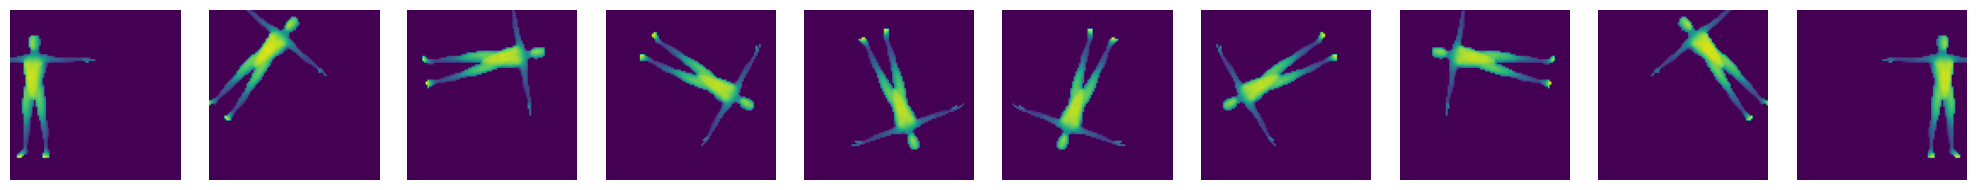

In [17]:

from text3d2video.camera_placement import front_facing_extrinsics
from pytorch3d.renderer import FoVPerspectiveCameras


x = torch.linspace(-0.5, 0.5, 10)
y = 0
degrees = torch.linspace(0, 360, 10)


rs, ts = front_facing_extrinsics(degrees=degrees, xs=x, ys=y)
# rs, ts = turntable_extrinsics(n=10)
cams = FoVPerspectiveCameras(R=rs, T=ts, device=device, fov=50)
mesh_views(mesh, cams, resolution=100)

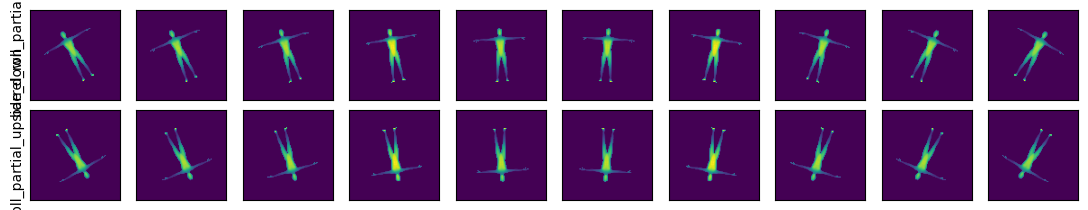

In [61]:
from text3d2video.camera_trajectories import *
from text3d2video.ipython_utils import display_ims_grid

meshes = load_objs_as_meshes(["data/meshes/mixamo-human.obj"], device=device)
meshes = normalize_meshes(meshes)

trajectories = [
    # RotationFull(),
    # RotationPartial(),
    # Rotation90(),
    # BarrelRoll(),
    # FoVZoom(),
    BarrelRollPartial(),
    BarrelRollPartialUpsideDown(),
    # OrthographicPanHorizontal(),
    # OrthographicPanVertical(),
    # OrthographicPanDiagonal()
]

resolution = 100
N = 10
renders = []
for i, trajectory in enumerate(trajectories):
    cameras = trajectory.cameras(N)
    frames = meshes.extend(len(cameras))
    depth_maps = render_depth_map(frames, cameras, resolution=resolution)
    renders.append(depth_maps)

display_ims_grid(renders, row_titles=[t.name for t in trajectories], scale=1.1)